In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

In [2]:
df = pd.read_csv('./nearest-earth-objects(1910-2024).csv')
df

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.140,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.500,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.450,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.630,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.700,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False
...,...,...,...,...,...,...,...,...,...
338194,54403809,(2023 VS4),28.580,0.005112,0.011430,Earth,56646.985988,6.406548e+07,False
338195,54415298,(2023 XW5),28.690,0.004859,0.010865,Earth,21130.768947,2.948883e+07,False
338196,54454871,(2024 KJ7),21.919,0.109839,0.245607,Earth,11832.041031,5.346078e+07,False
338197,54456245,(2024 NE),23.887,0.044377,0.099229,Earth,56198.382733,5.184742e+06,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [4]:
df.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [5]:
df['orbiting_body'].nunique()

1

In [6]:
df.drop(columns=['neo_id','orbiting_body'],inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

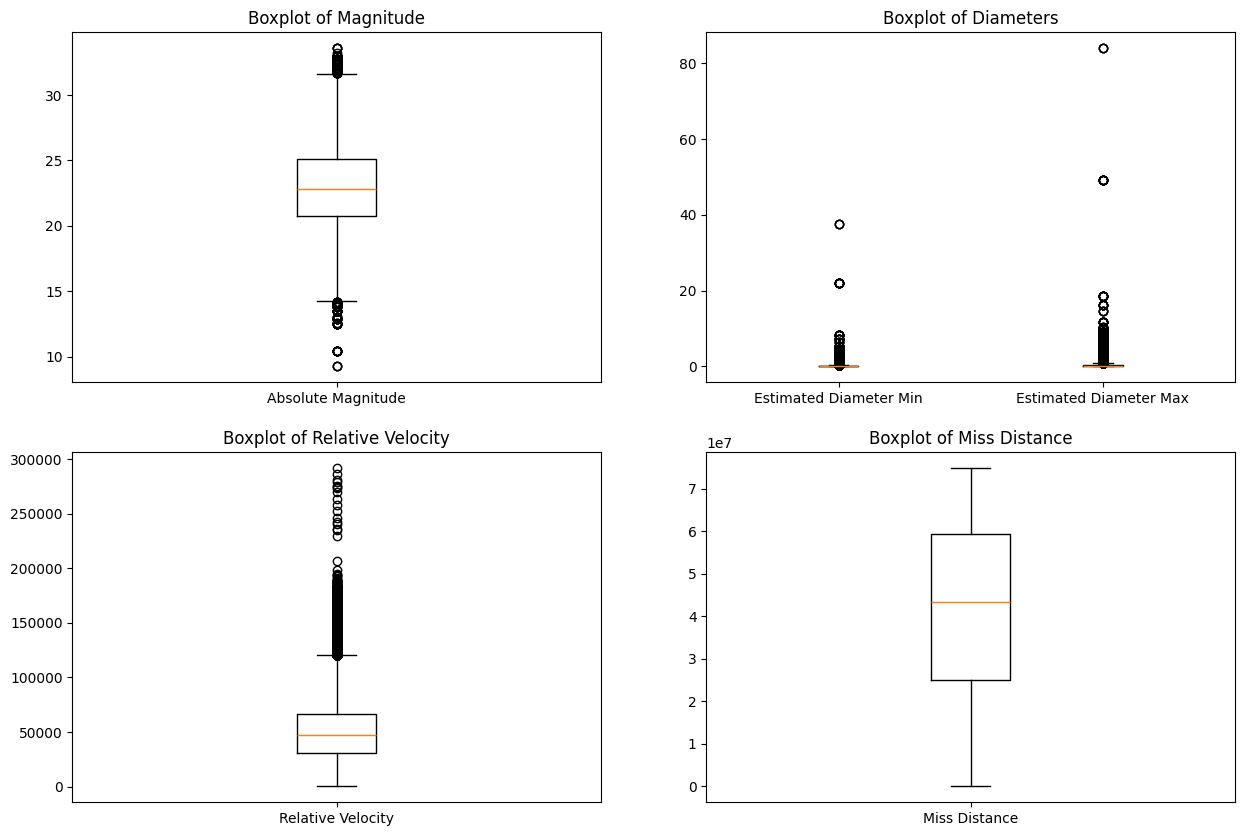

In [11]:
# plt.boxplot(df.drop(columns=['name','is_hazardous','miss_distance','relative_velocity']))

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0,0].boxplot(df[['absolute_magnitude']])
ax[0,0].set_xticklabels(['Absolute Magnitude'])
ax[0,0].set_title('Boxplot of Magnitude')

ax[0,1].boxplot(df[[ 'estimated_diameter_min', 'estimated_diameter_max']])
ax[0,1].set_xticklabels(['Estimated Diameter Min', 'Estimated Diameter Max'])
ax[0,1].set_title('Boxplot of Diameters')                  
                  
ax[1,0].boxplot(df[['relative_velocity']])
ax[1,0].set_xticklabels(['Relative Velocity'])
ax[1,0].set_title('Boxplot of Relative Velocity')


ax[1,1].boxplot(df[['miss_distance']])
ax[1,1].set_xticklabels(['Miss Distance'])
ax[1,1].set_title('Boxplot of Miss Distance')

plt.show()

## Outliers exists knn is not suitable

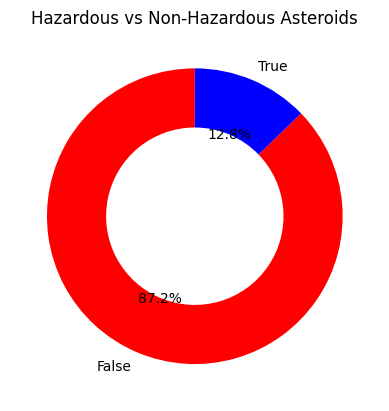

In [12]:
hazardous_counts = df['is_hazardous'].value_counts()

fig, ax = plt.subplots()
ax.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', colors=['r','b'], startangle=90, wedgeprops={'width': 0.4})
ax.set_title('Hazardous vs Non-Hazardous Asteroids')

plt.show()#it is biased

In [13]:
df['is_hazardous'].value_counts()

is_hazardous
False    295009
True      43162
Name: count, dtype: int64

In [14]:
target_column = 'is_hazardous'

# Split the data into features (X) and target labels (y)
X = df.drop(columns=[target_column,'name'])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Create a Decision Tree model
tree_model1 = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
tree_model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Make predictions on the testing data
y_pred = tree_model1.predict(X_test)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8918015820211429
Confusion Matrix:
[[55258  3608]
 [ 3710  5059]]
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     58866
        True       0.58      0.58      0.58      8769

    accuracy                           0.89     67635
   macro avg       0.76      0.76      0.76     67635
weighted avg       0.89      0.89      0.89     67635



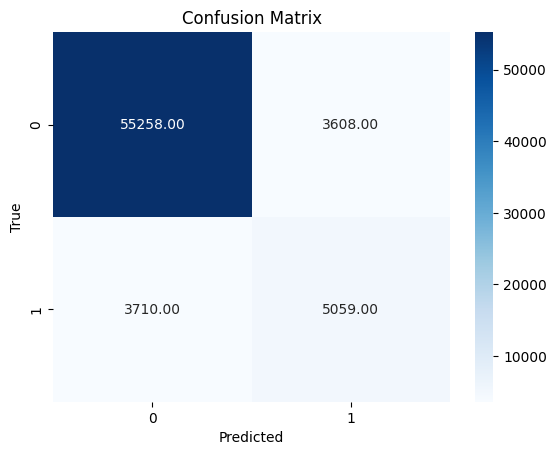

In [17]:
cm = confusion_matrix(y_test, y_pred)

# The rest of the code remains the same for plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

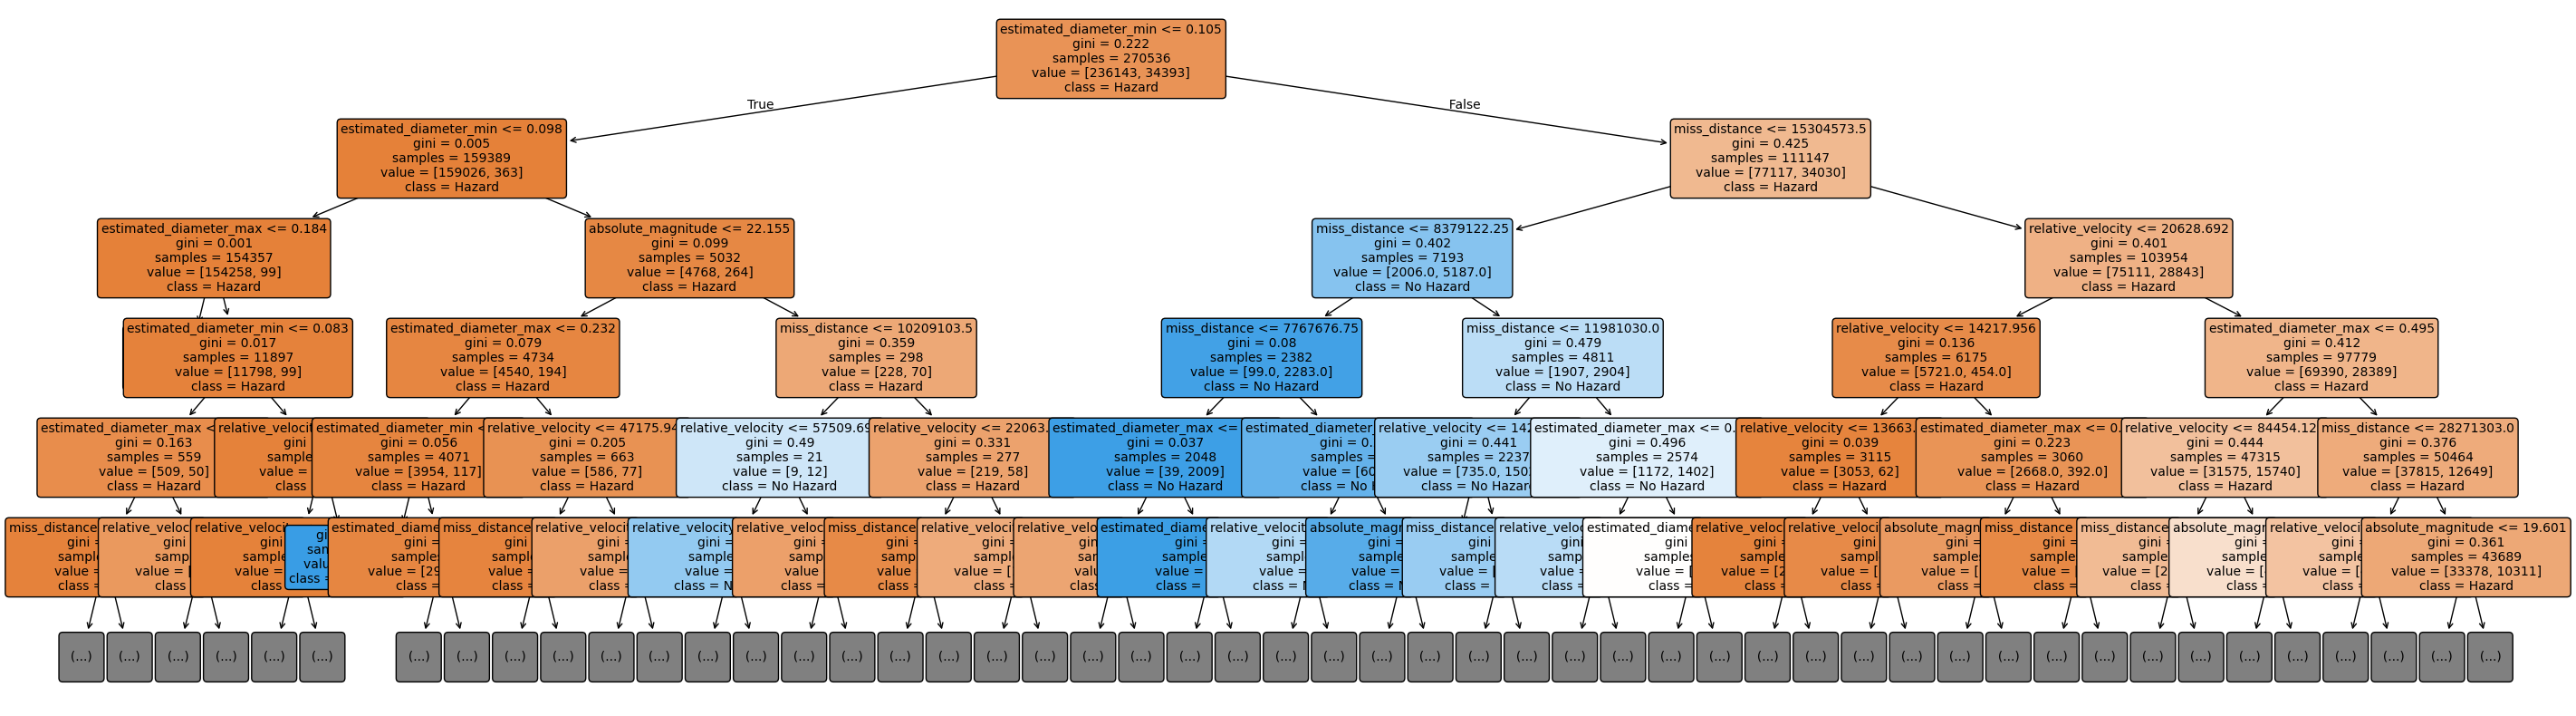

In [18]:
# Access the decision tree model
single_tree = tree_model1

# Set the figure size and background color
plt.figure(figsize=(35, 10), facecolor='white')

# Plot the decision tree
plot_tree(single_tree, feature_names=X_train.columns,class_names=['Hazard','No Hazard'], rounded=True, filled=True, fontsize=10, max_depth=5)

# Show the plot
plt.show()

# SMOTE

In [19]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)


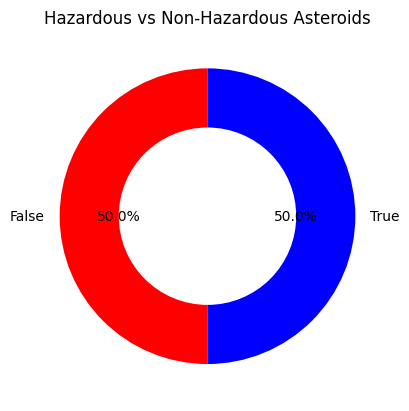

In [20]:
fig, ax = plt.subplots()
ax.pie(y_resampled.value_counts(), labels=hazardous_counts.index, autopct='%1.1f%%', colors=['r','b'], startangle=90, wedgeprops={'width': 0.4})
ax.set_title('Hazardous vs Non-Hazardous Asteroids')

plt.show()

In [21]:
# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=40)

# Create a Decision Tree model
tree_model2 = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
tree_model2.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=42)

In [22]:
y2_pred = tree_model2.predict(X2_test)

In [23]:
accuracy = accuracy_score(y2_test, y2_pred)
conf_matrix = confusion_matrix(y2_test, y2_pred)
classification_rep = classification_report(y2_test, y2_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.937849564421545
Confusion Matrix:
[[55325  3608]
 [ 3726 55345]]
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.94      0.94     58933
        True       0.94      0.94      0.94     59071

    accuracy                           0.94    118004
   macro avg       0.94      0.94      0.94    118004
weighted avg       0.94      0.94      0.94    118004



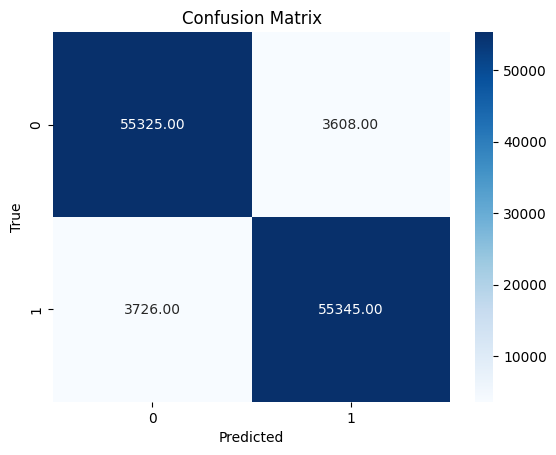

In [24]:
cm = confusion_matrix(y2_test, y2_pred)

# The rest of the code remains the same for plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

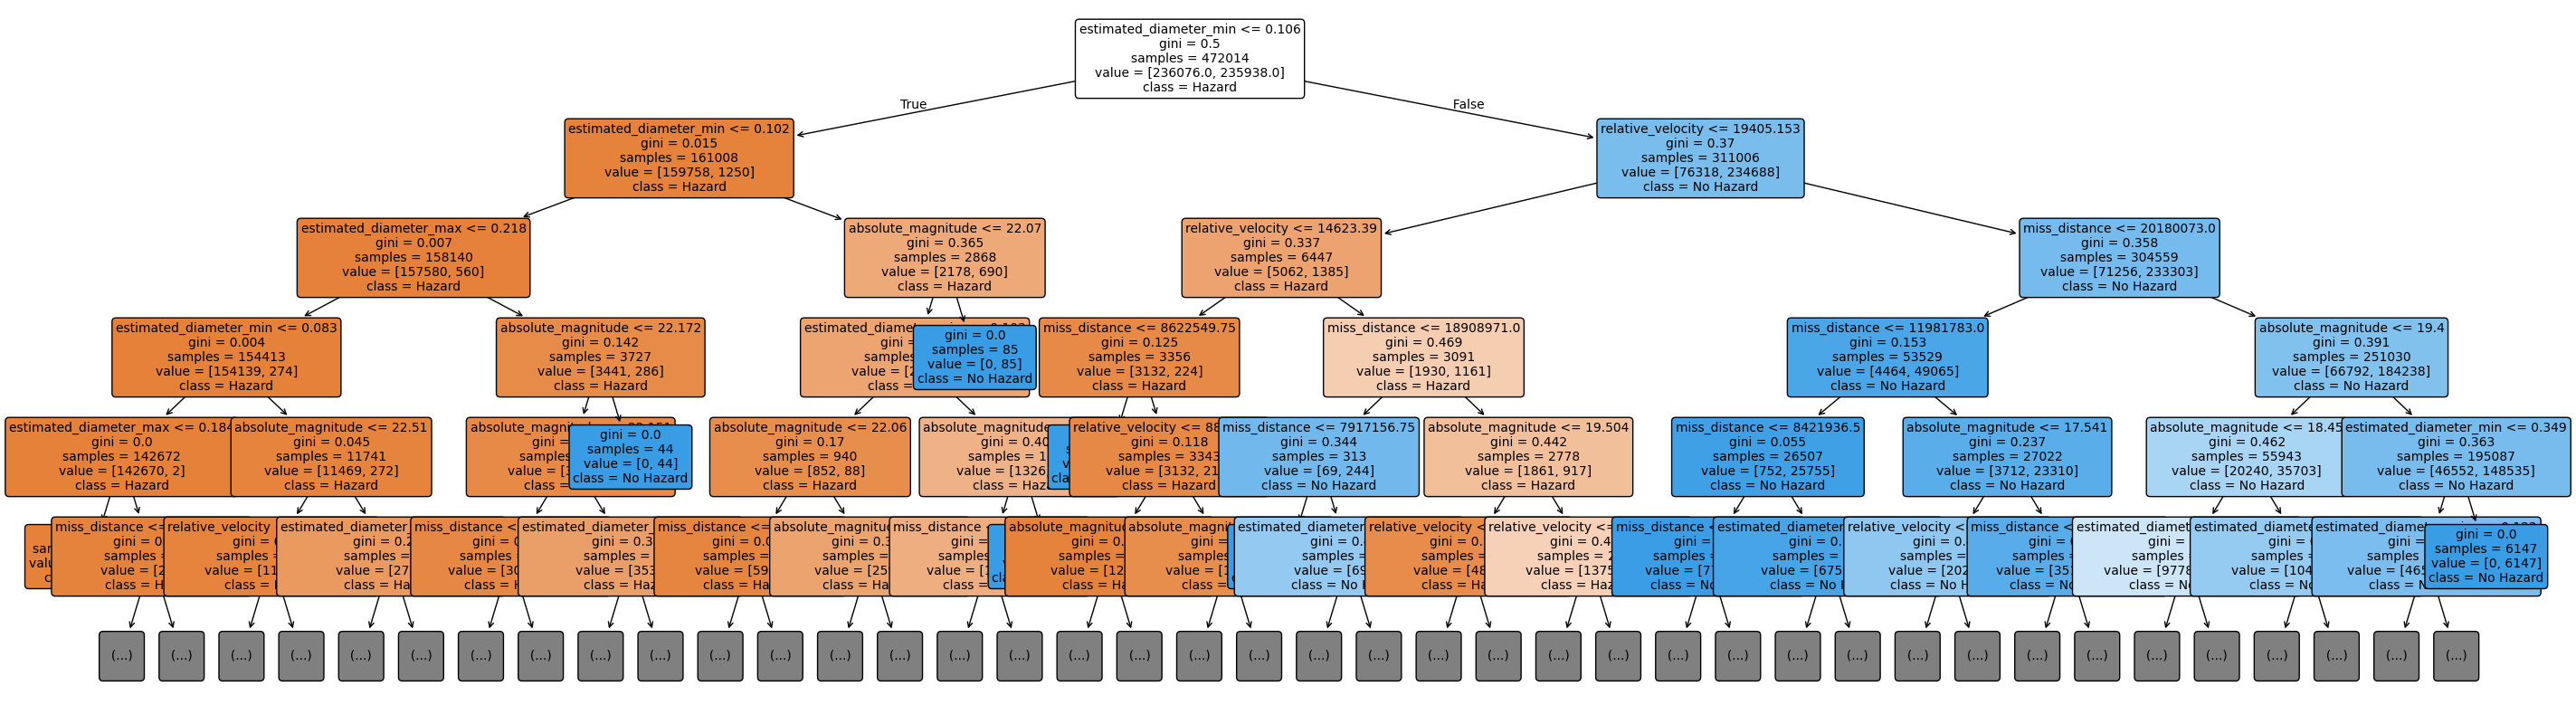

In [25]:
# Access the decision tree model
single_tree = tree_model2

# Set the figure size and background color
plt.figure(figsize=(35, 10), facecolor='white')

# Plot the decision tree
plot_tree(single_tree, feature_names=X2_train.columns, class_names=['Hazard','No Hazard'], rounded=True, filled=True, fontsize=10, max_depth=5)

# Show the plot
plt.show()

# Random OverSampling

In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros_train,y_ros_train = ros.fit_resample(X_train,y_train)

In [27]:
print(X_ros_train.shape, y_ros_train.shape)

(472286, 5) (472286,)


In [28]:
Y_COUNT=y_ros_train.value_counts()

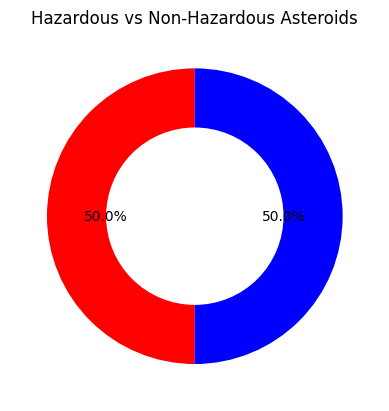

In [29]:
fig, ax = plt.subplots()
ax.pie(Y_COUNT, autopct='%1.1f%%', colors=['r','b'], startangle=90, wedgeprops={'width': 0.4})
ax.set_title('Hazardous vs Non-Hazardous Asteroids')

plt.show()

In [30]:
# Split the data into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X_ros_train, y_ros_train, test_size=0.2, random_state=40)

# Create a Decision Tree model
tree_model3 = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
tree_model3.fit(X3_train, y3_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y3_pred = tree_model3.predict(X3_test)

In [32]:
accuracy = accuracy_score(y3_test, y3_pred)
conf_matrix = confusion_matrix(y3_test, y3_pred)
classification_rep = classification_report(y3_test, y3_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.9641851404857186
Confusion Matrix:
[[44122  3347]
 [   36 46953]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.93      0.96     47469
        True       0.93      1.00      0.97     46989

    accuracy                           0.96     94458
   macro avg       0.97      0.96      0.96     94458
weighted avg       0.97      0.96      0.96     94458



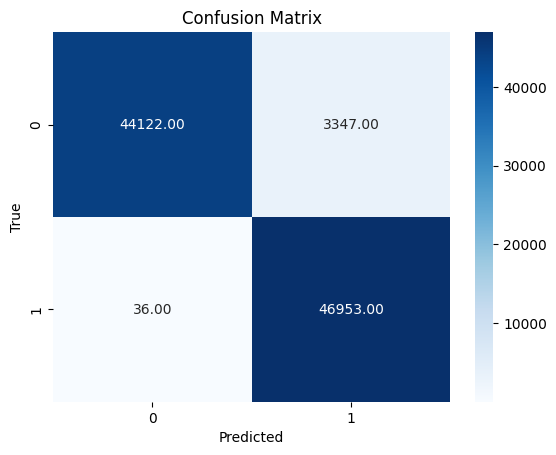

In [33]:
cm3 = confusion_matrix(y3_test, y3_pred)

# The rest of the code remains the same for plotting the confusion matrix
sns.heatmap(cm3, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

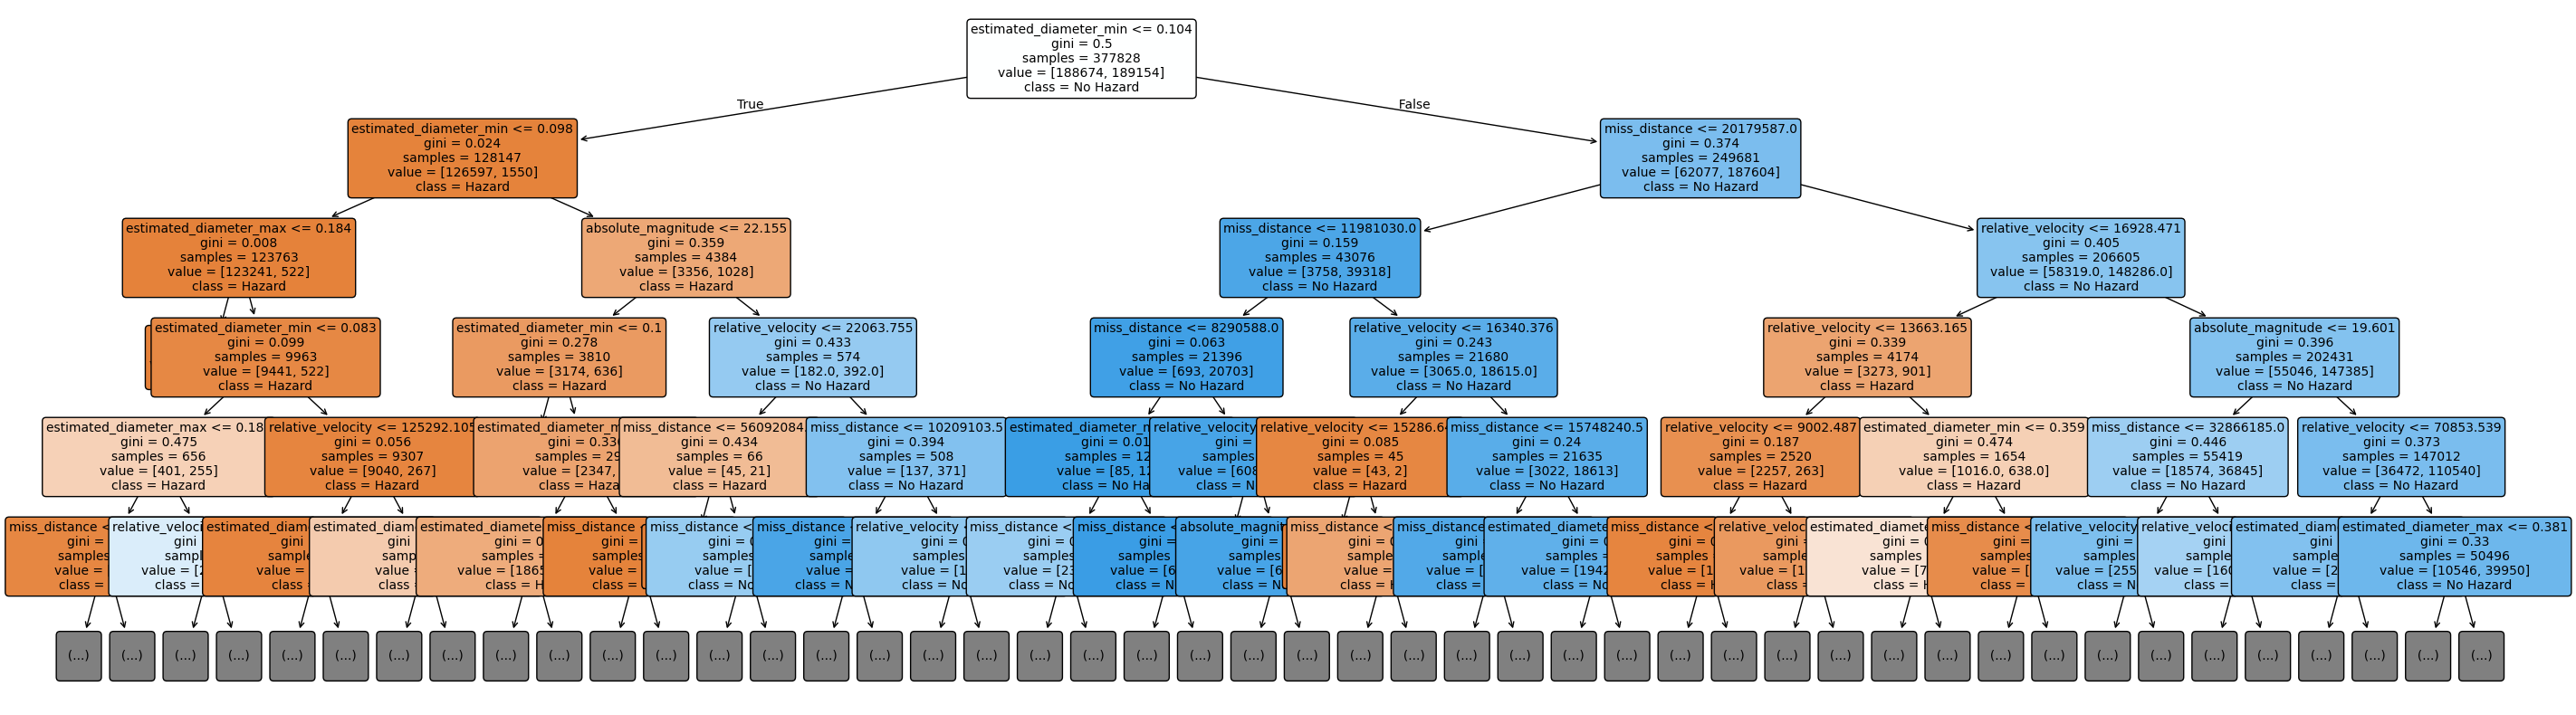

In [34]:
# Access the decision tree model
single_tree = tree_model3

# Set the figure size and background color
plt.figure(figsize=(35, 10), facecolor='white')

# Plot the decision tree
plot_tree(single_tree, feature_names=X3_train.columns, class_names=['Hazard','No Hazard'], rounded=True, filled=True, fontsize=10, max_depth=5)

# Show the plot
plt.show()

# Random >Undersampling

In [35]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_rus_train,y_rus_train = ros.fit_resample(X_train,y_train)

In [36]:
print(X_rus_train.shape, y_rus_train.shape)

(68786, 5) (68786,)


In [37]:
Y_COUNT=y_rus_train.value_counts()

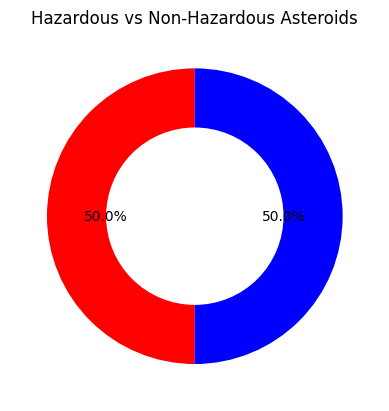

In [38]:
fig, ax = plt.subplots()
ax.pie(Y_COUNT, autopct='%1.1f%%', colors=['r','b'], startangle=90, wedgeprops={'width': 0.4})
ax.set_title('Hazardous vs Non-Hazardous Asteroids')

plt.show()

In [39]:
# Split the data into training and testing sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X_rus_train, y_rus_train, test_size=0.2, random_state=42)

# Create a Decision Tree model
tree_model4 = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
tree_model4.fit(X4_train, y4_train)

DecisionTreeClassifier(random_state=42)

In [40]:
y4_pred = tree_model4.predict(X4_test)

In [41]:
accuracy = accuracy_score(y4_test, y4_pred)
conf_matrix = confusion_matrix(y4_test, y4_pred)
classification_rep = classification_report(y4_test, y4_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8073847943014973
Confusion Matrix:
[[5488 1356]
 [1294 5620]]
Classification Report:
              precision    recall  f1-score   support

       False       0.81      0.80      0.81      6844
        True       0.81      0.81      0.81      6914

    accuracy                           0.81     13758
   macro avg       0.81      0.81      0.81     13758
weighted avg       0.81      0.81      0.81     13758



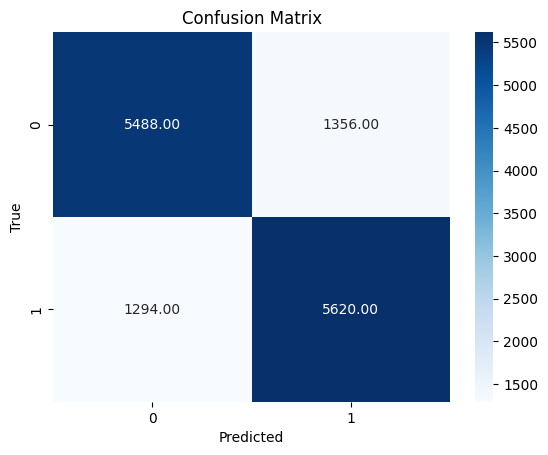

In [42]:
cm4 = confusion_matrix(y4_test, y4_pred)

# The rest of the code remains the same for plotting the confusion matrix
sns.heatmap(cm4, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

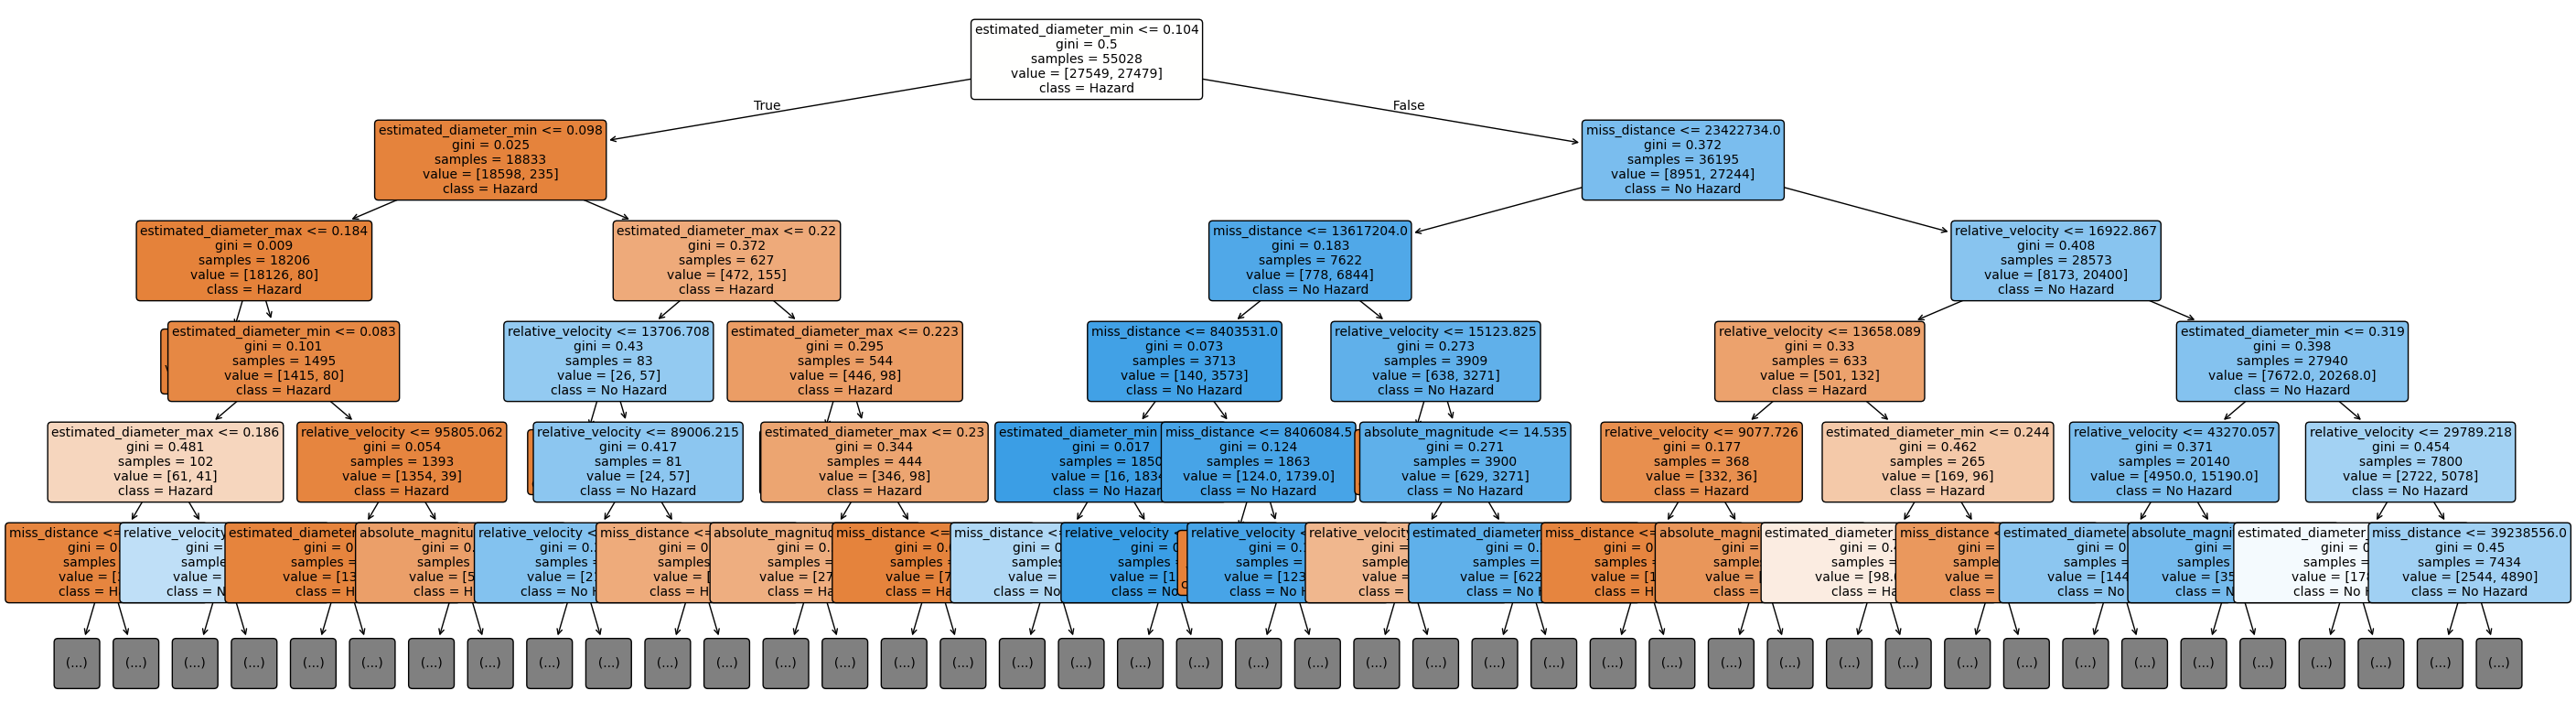

In [43]:
# Access the decision tree model
single_tree = tree_model4

# Set the figure size and background color
plt.figure(figsize=(35, 10), facecolor='white')

# Plot the decision tree
plot_tree(single_tree, feature_names=X_train.columns, class_names=['Hazard','No Hazard'], rounded=True, filled=True, fontsize=10, max_depth=5)

# Show the plot
plt.show()

# Random forest

In [44]:
target_column = 'is_hazardous'

X = df.drop(columns=[target_column,'name'])
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model (modify n_estimators and other parameters as needed)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.97      0.95     59088
        True       0.71      0.59      0.64      8547

    accuracy                           0.92     67635
   macro avg       0.83      0.78      0.80     67635
weighted avg       0.91      0.92      0.91     67635

Confusion Matrix:
[[57070  2018]
 [ 3518  5029]]


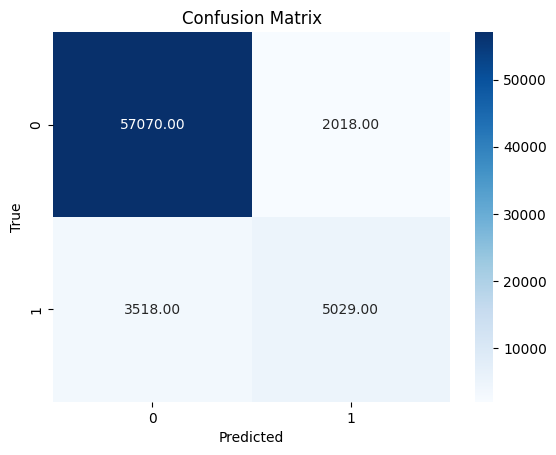

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# The rest of the code remains the same for plotting the confusion matrix
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Use SelectFromModel to select important features based on the Random Forest model
sel = SelectFromModel(rf_model)
sel.fit(X_train, y_train)
selected_features = X_train.columns[sel.get_support()]

# Print selected features
print("Number of selected features:", len(selected_features))
print("Selected features:", selected_features)

In [ ]:
selected_features_df = pd.DataFrame(columns=selected_features)
print(selected_features_df.head())

In [ ]:
single_tree = rf_model.estimators_[0]

# Set the figure size and background color
plt.figure(figsize=(35, 10), facecolor='white')

# Plot the decision tree
plot_tree(single_tree, feature_names=X_train.columns, class_names=['Hazard','No Hazard'], rounded=True, filled=True, fontsize=12, max_depth=5)

# Show the plot
plt.show()

# oversampling got the best accuracy but i will choose the random forest for the future